In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

# Import the G_Key
from config import g_key

# Import Google Maps
import gmaps

%matplotlib inline

from ipywidgets.embed import embed_minimal_html

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # To get the response and print response
        #response = requests.get(city_url)
        #print(city_weather)
        #city_weather = response.json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})                                        

# If an error is experienced, skip the city.
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass

    #time.sleep(1)
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | camacha
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | gurskoye
'coord'
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | sorvag
'coord'
City not found. Skipping...
Processing Record 7 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ambulu
Processing Record 11 of Set 1 | la sarre
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | sovetskiy
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | elizabeth city
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hilo
Processing Record 

Processing Record 31 of Set 4 | bengkulu
Processing Record 32 of Set 4 | mar del plata
Processing Record 33 of Set 4 | san cristobal
Processing Record 34 of Set 4 | tsihombe
'coord'
City not found. Skipping...
Processing Record 35 of Set 4 | hurricane
Processing Record 36 of Set 4 | zhigansk
Processing Record 37 of Set 4 | clyde river
Processing Record 38 of Set 4 | gat
Processing Record 39 of Set 4 | vestmannaeyjar
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | galgani
'coord'
City not found. Skipping...
Processing Record 45 of Set 4 | sisimiut
Processing Record 46 of Set 4 | benjamin constant
Processing Record 47 of Set 4 | san rafael
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | natal
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | ponta do sol
P

Processing Record 20 of Set 8 | jacareacanga
Processing Record 21 of Set 8 | general teran
Processing Record 22 of Set 8 | rio gallegos
Processing Record 23 of Set 8 | aswan
Processing Record 24 of Set 8 | le vauclin
Processing Record 25 of Set 8 | kizukuri
Processing Record 26 of Set 8 | san felipe
Processing Record 27 of Set 8 | san patricio
Processing Record 28 of Set 8 | ulagan
Processing Record 29 of Set 8 | ancud
Processing Record 30 of Set 8 | taltal
Processing Record 31 of Set 8 | zunyi
Processing Record 32 of Set 8 | olga
Processing Record 33 of Set 8 | sarangani
Processing Record 34 of Set 8 | kyzyl-suu
Processing Record 35 of Set 8 | olivenza
Processing Record 36 of Set 8 | gull lake
Processing Record 37 of Set 8 | beni
Processing Record 38 of Set 8 | ostersund
Processing Record 39 of Set 8 | cap-aux-meules
Processing Record 40 of Set 8 | puerto ayacucho
Processing Record 41 of Set 8 | kyra
Processing Record 42 of Set 8 | luau
Processing Record 43 of Set 8 | sao jose da coro

Processing Record 2 of Set 12 | kapit
Processing Record 3 of Set 12 | tula
Processing Record 4 of Set 12 | kalach-na-donu
Processing Record 5 of Set 12 | jodhpur
Processing Record 6 of Set 12 | xiaoweizhai
Processing Record 7 of Set 12 | dagestanskiye ogni
Processing Record 8 of Set 12 | dodge city
Processing Record 9 of Set 12 | sola
Processing Record 10 of Set 12 | lakkion
Processing Record 11 of Set 12 | wuda
Processing Record 12 of Set 12 | mantua
Processing Record 13 of Set 12 | axim
Processing Record 14 of Set 12 | malm
Processing Record 15 of Set 12 | alugan
Processing Record 16 of Set 12 | zonguldak
Processing Record 17 of Set 12 | lembeni
Processing Record 18 of Set 12 | bathsheba
Processing Record 19 of Set 12 | durazno
Processing Record 20 of Set 12 | mercedes
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | ovsyanka
Processing Record 23 of Set 12 | wajima
Processing Record 24 of Set 12 | luwuk
Processing Record 25 of Set 12 | alizai
Pr

In [7]:
len(city_data)

571

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,2021-05-29 00:42:16,97,42.0970,-79.2353,44.10,5.99
1,Camacha,20,PT,2021-05-29 00:42:16,72,33.0833,-16.3333,63.54,6.91
2,Kavieng,39,PG,2021-05-29 00:42:16,70,-2.5744,150.7967,85.05,10.40
3,Atuona,10,PF,2021-05-29 00:42:17,73,-9.8000,-139.0333,78.96,14.25
4,College,75,US,2021-05-29 00:37:51,41,64.8569,-147.8028,48.18,1.01
5,Rikitea,60,PF,2021-05-29 00:42:17,74,-23.1203,-134.9692,76.57,20.83
6,Ambulu,97,ID,2021-05-29 00:42:18,80,-8.3450,113.6058,79.81,1.41
7,La Sarre,0,CA,2021-05-29 00:42:18,46,48.8002,-79.1996,41.20,7.52
8,Butaritari,100,KI,2021-05-29 00:42:18,80,3.0707,172.7902,82.49,15.61
9,Sovetskiy,100,RU,2021-05-29 00:42:19,78,61.3614,63.5842,50.76,7.45


In [9]:
# Reorder the columns
new_column_order = ["City","Country","Date","Lat","Lng","Humidity","Cloudiness","Wind Speed","Max Temp"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,Jamestown,US,2021-05-29 00:42:16,42.0970,-79.2353,97,90,5.99,44.10
1,Camacha,PT,2021-05-29 00:42:16,33.0833,-16.3333,72,20,6.91,63.54
2,Kavieng,PG,2021-05-29 00:42:16,-2.5744,150.7967,70,39,10.40,85.05
3,Atuona,PF,2021-05-29 00:42:17,-9.8000,-139.0333,73,10,14.25,78.96
4,College,US,2021-05-29 00:37:51,64.8569,-147.8028,41,75,1.01,48.18
5,Rikitea,PF,2021-05-29 00:42:17,-23.1203,-134.9692,74,60,20.83,76.57
6,Ambulu,ID,2021-05-29 00:42:18,-8.3450,113.6058,80,97,1.41,79.81
7,La Sarre,CA,2021-05-29 00:42:18,48.8002,-79.1996,46,0,7.52,41.20
8,Butaritari,KI,2021-05-29 00:42:18,3.0707,172.7902,80,100,15.61,82.49
9,Sovetskiy,RU,2021-05-29 00:42:19,61.3614,63.5842,78,100,7.45,50.76


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

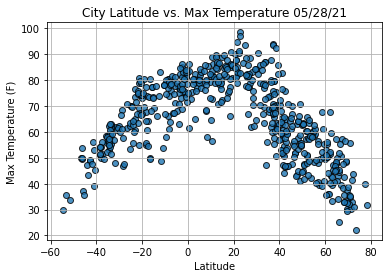

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

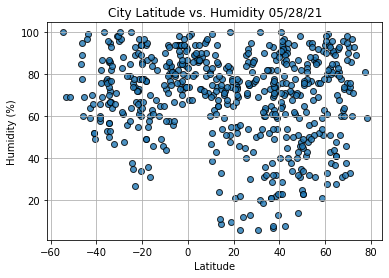

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

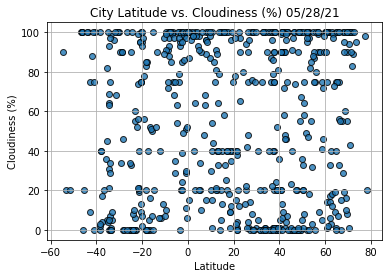

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

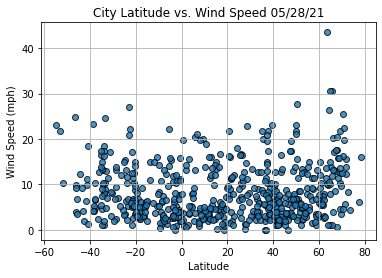

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2021-05-29 00:42:20
Lat                      -33.9258
Lng                       18.4232
Humidity                       95
Cloudiness                     75
Wind Speed                   1.01
Max Temp                    59.41
Name: 13, dtype: object

In [18]:
(city_data_df['Lat'] >=0).head(11)

0      True
1      True
2     False
3     False
4      True
5     False
6     False
7      True
8      True
9      True
10     True
Name: Lat, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,Jamestown,US,2021-05-29 00:42:16,42.0970,-79.2353,97,90,5.99,44.10
1,Camacha,PT,2021-05-29 00:42:16,33.0833,-16.3333,72,20,6.91,63.54
4,College,US,2021-05-29 00:37:51,64.8569,-147.8028,41,75,1.01,48.18
7,La Sarre,CA,2021-05-29 00:42:18,48.8002,-79.1996,46,0,7.52,41.20
8,Butaritari,KI,2021-05-29 00:42:18,3.0707,172.7902,80,100,15.61,82.49


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

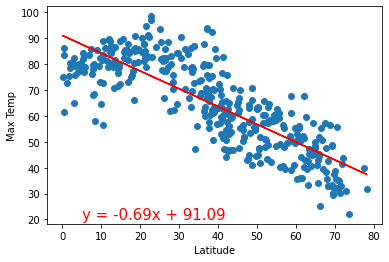

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,20))

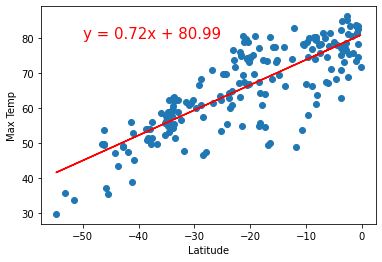

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

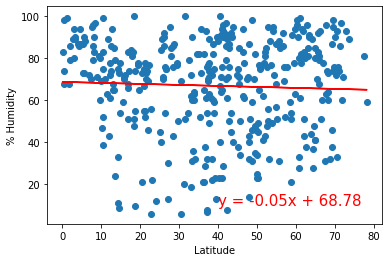

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

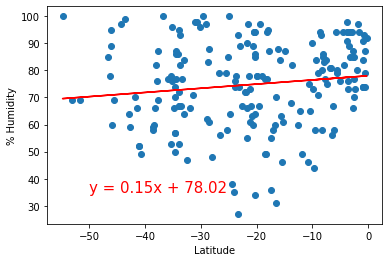

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,35))

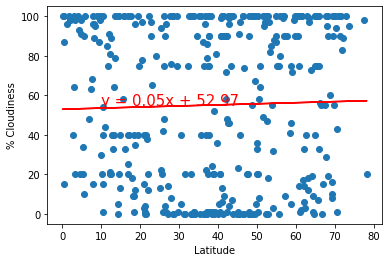

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

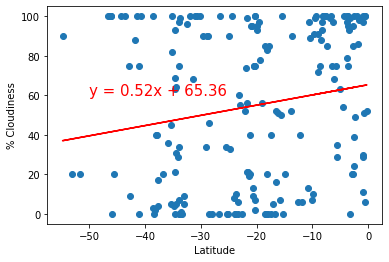

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

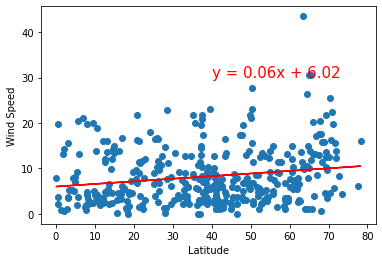

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

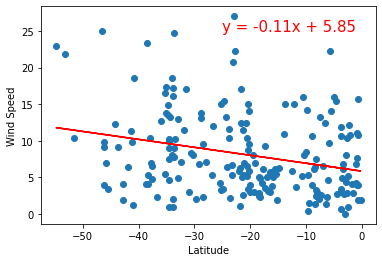

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,25))

In [29]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,0,Jamestown,US,2021-05-29 00:42:16,42.0970,-79.2353,97,90,5.99,44.10
1,1,Camacha,PT,2021-05-29 00:42:16,33.0833,-16.3333,72,20,6.91,63.54
2,2,Kavieng,PG,2021-05-29 00:42:16,-2.5744,150.7967,70,39,10.40,85.05
3,3,Atuona,PF,2021-05-29 00:42:17,-9.8000,-139.0333,73,10,14.25,78.96
4,4,College,US,2021-05-29 00:37:51,64.8569,-147.8028,41,75,1.01,48.18


In [30]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Max Temp      float64
dtype: object

In [31]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [34]:
# Heatmap of temperature

# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations , weights=[max(temp, 0) for temp in max_temp],dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of percent windspeed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
embed_minimal_html('export.html', views=[fig])

In [39]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [40]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
2,2,Kavieng,PG,2021-05-29 00:42:16,-2.5744,150.7967,70,39,10.40,85.05
3,3,Atuona,PF,2021-05-29 00:42:17,-9.8000,-139.0333,73,10,14.25,78.96
5,5,Rikitea,PF,2021-05-29 00:42:17,-23.1203,-134.9692,74,60,20.83,76.57
6,6,Ambulu,ID,2021-05-29 00:42:18,-8.3450,113.6058,80,97,1.41,79.81
8,8,Butaritari,KI,2021-05-29 00:42:18,3.0707,172.7902,80,100,15.61,82.49
12,12,Elizabeth City,US,2021-05-29 00:42:19,36.2946,-76.2511,65,75,1.99,87.85
16,16,Hilo,US,2021-05-29 00:38:35,19.7297,-155.0900,65,75,9.22,85.28
21,21,Kapaa,US,2021-05-29 00:42:21,22.0752,-159.3190,69,20,1.99,82.72
25,25,Tuy Hoa,VN,2021-05-29 00:42:22,13.0833,109.3000,68,33,4.65,86.07
29,29,Sorong,ID,2021-05-29 00:42:24,-0.8833,131.2500,84,11,11.12,81.37


In [41]:
preferred_cities_df.count()

City_ID       179
City          179
Country       179
Date          179
Lat           179
Lng           179
Humidity      179
Cloudiness    179
Wind Speed    179
Max Temp      179
dtype: int64

In [42]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Kavieng,PG,85.05,-2.5744,150.7967,
3,Atuona,PF,78.96,-9.8000,-139.0333,
5,Rikitea,PF,76.57,-23.1203,-134.9692,
6,Ambulu,ID,79.81,-8.3450,113.6058,
8,Butaritari,KI,82.49,3.0707,172.7902,
12,Elizabeth City,US,87.85,36.2946,-76.2511,
16,Hilo,US,85.28,19.7297,-155.0900,
21,Kapaa,US,82.72,22.0752,-159.3190,
25,Tuy Hoa,VN,86.07,13.0833,109.3000,
29,Sorong,ID,81.37,-0.8833,131.2500,


In [44]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [57]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
   
    # Grab the first hotel from the results and store the name.
    try:
          hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
          print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [59]:
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Kavieng,PG,85.05,-2.5744,150.7967,Nusa Island Retreat
3,Atuona,PF,78.96,-9.8000,-139.0333,Villa Enata
5,Rikitea,PF,76.57,-23.1203,-134.9692,Pension Maro'i
6,Ambulu,ID,79.81,-8.3450,113.6058,Hotel Ambulu Jember
8,Butaritari,KI,82.49,3.0707,172.7902,Isles Sunset Lodge


In [60]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [62]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [63]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [64]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))